In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

import copy

In [2]:
df = pd.read_csv('/insurance.csv') #creating dataframe using CSV file

In [4]:
df.head() #to check first 5 rows


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape #this is used to know the number of rows and columns

(1338, 7)

In [10]:
df.isna().apply(pd.value_counts) 

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


In [11]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


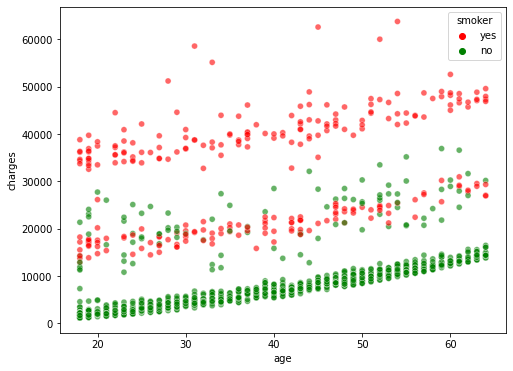

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

In [13]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


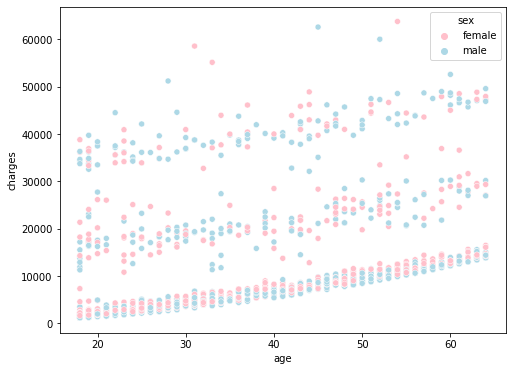

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.sex,palette= ['pink','lightblue'] )
plt.show()

In [17]:
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(df['sex'],df['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [18]:
Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(df[df['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
